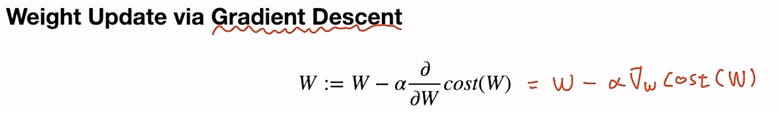

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

In [3]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]] # |x_data| = (6,2)
y_data = [[0],[0],[0],[1],[1],[1]] # |y_data| = (6,)

In [4]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [5]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [6]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [8]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [9]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [10]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


In [11]:
losses = - (y_train * torch.log(hypothesis) + 
            (1-y_train) * torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [12]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [13]:
cost = F.binary_cross_entropy(hypothesis, y_train)
print(cost)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)


## Whole Training Procedure

In [14]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# W와 b를 업데이트 하겠다
optimizer = optim.SGD((W, b), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad() # gradient 0으로 초기화(안하면 gradient 구할때마다 더해지게 됨)
    cost.backward() # cost에 backpropagatio 수행
    optimizer.step() # cost 값을 minimize하는 방향으로 W와 b 업데이트
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


## Evaluation

In [15]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])
print(y_train[:5])

correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])
tensor([[True],
        [True],
        [True],
        [True],
        [True]])


## Higher Implementation with Class

In [25]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1) # self.linear = {W, b}
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [26]:
model = BinaryClassifier()

In [27]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad() # gradient 0으로 초기화(안하면 gradient 구할때마다 더해지게 됨)
    cost.backward() # cost에 backpropagatio 수행
    optimizer.step() # cost 값을 minimize하는 방향으로 W와 b 업데이트
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
        epoch, nb_epochs, cost.item(), accuracy * 100
        ))

Epoch    0/100 Cost: 0.812183 Accuracy 50.00%
Epoch   10/100 Cost: 0.591924 Accuracy 50.00%
Epoch   20/100 Cost: 0.466041 Accuracy 66.67%
Epoch   30/100 Cost: 0.394314 Accuracy 83.33%
Epoch   40/100 Cost: 0.334662 Accuracy 83.33%
Epoch   50/100 Cost: 0.282545 Accuracy 83.33%
Epoch   60/100 Cost: 0.235368 Accuracy 100.00%
Epoch   70/100 Cost: 0.193879 Accuracy 100.00%
Epoch   80/100 Cost: 0.163959 Accuracy 100.00%
Epoch   90/100 Cost: 0.147901 Accuracy 100.00%
Epoch  100/100 Cost: 0.137423 Accuracy 100.00%
